In [1]:
# Test migration history reconstruction on breast cancer data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'src/data/msk_met/msk_met_freq_one_met_patients.csv')
                          
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = data_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
    O = data_util.get_organotropism_matrix(unique_sites, HOAD_MSK_MET_MAP, MSK_MET_FN)
    print("O", O)
    weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0, organotrop=0.5)
    print_config = vert_util.PrintConfig(visualize=True, verbose=True, viz_intermeds=False)
    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                O=O, weights=weights, print_config=print_config, p=r, 
                                                node_idx_to_label=idx_to_label, batch_size=32, init_temp=30, 
                                                final_temp=0.01, max_iter=300, custom_colors=custom_colors, 
                                                primary="breast")

/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/vertex_labeling_util.py:418: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(candidates) == 1, f"{msg} root node detected")
15:54:46 INFO
NumExpr defaulting to 8 threads.


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3571e-02],
        [-1.0000e+00, -1.0000e+00,  8.4034e-03,  3.6134e-01,  3.3613e-02,
          5.0420e-02],
        [-1.0000e+00,  9.3812e-02,  9.9800e-04,  2.0958e-02,  1.5369e-01,
          1.0379e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e

15:55:01 DEBUG
Loaded backend module://matplotlib_inline.backend_inline version unknown.
15:55:01 DEBUG
Loaded backend module://matplotlib_inline.backend_inline version unknown.


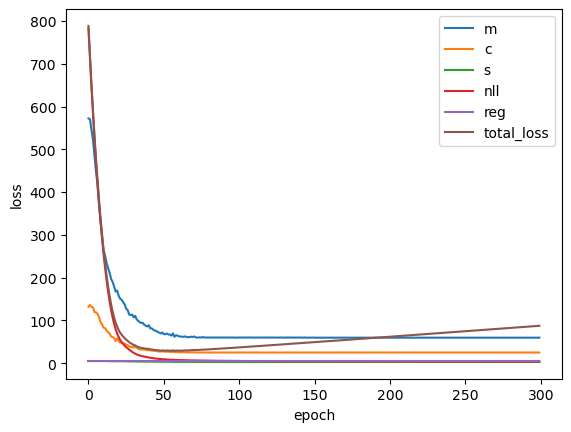

15:55:01 DEBUG

U > 0.05

15:55:01 DEBUG
        norm     1     2     3     4     5     6     7     8     9    10
breast 0.475 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.342 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000 0.000 0.361
kidney 0.571 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.402 0.000 0.000
liver  0.146 0.000 0.000 0.060 0.000 0.408 0.000 0.000 0.000 0.374 0.000
lung   0.305 0.000 0.000 0.000 0.000 0.000 0.000 0.600 0.000 0.000 0.000
rib    0.278 0.000 0.000 0.000 0.000 0.000 0.702 0.000 0.000 0.000 0.000
15:55:01 DEBUG

F_hat
15:55:01 DEBUG
          0     1     2     3     4     5     6     7     8     9     10
breast 0.992 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.965 0.623 0.000 0.000 0.623 0.000 0.000 0.000 0.000 0.000 0.361
kidney 0.974 0.402 0.402 0.402 0.000 0.402 0.000 0.000 0.402 0.000 0.000
liver  0.988 0.842 0.842 0.842 0.000 0.782 0.000 0.000 0.000 0.374 0.000
lung   0.906 0.600 0.000 0.000 0.600 0.000 0.0

Time elapsed: 15.054194
print_config.k_best_trees 1
****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.825
Reg: 5.999999523162842
Organotropism penalty: 0.701
site_adj_no_diag
 tensor([[0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00

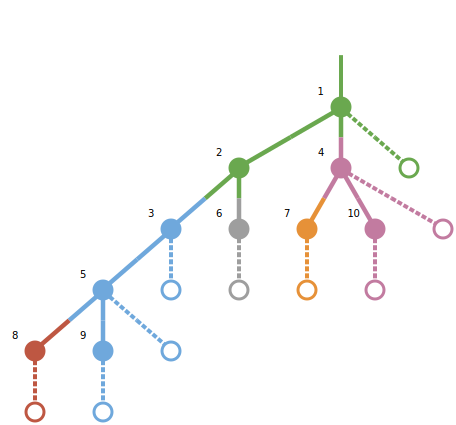

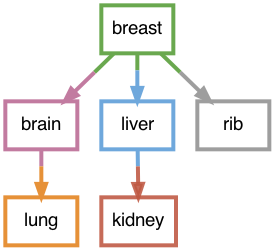

15:55:02 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


  1   #6aa84fff;1.0:
  2   #6aa84fff;1.0:
  1     2   0.03125000005820766 2.0
  1   #6aa84fff;1.0:
  4   #c27ba0ff;0.7416301369667053:#e69138ff;0.2583698332309723:
  1     4   0.03125000005820766 2.5
  1   #6aa84fff;1.0:
1_breast #6aa84fff;1.0:
  1   1_breast 0.03125000005820766 2.5
  2   #6aa84fff;1.0:
  3   #6fa8dcff;1.0:
  2     3   0.03125000005820766 2.5
  2   #6aa84fff;1.0:
  6   #9e9e9eff;1.0:
  2     6   0.03125000005820766 2.5
  3   #6fa8dcff;1.0:
  5   #6fa8dcff;1.0:
  3     5   0.03125000005820766 2.5
  3   #6fa8dcff;1.0:
3_liver #6fa8dcff;1.0:
  3   3_liver 0.03125000005820766 2.5
  4   #c27ba0ff;0.7416301369667053:#e69138ff;0.2583698332309723:
  7   #e69138ff;1.0:
  4     7   0.03125000005820766 2.5
  4   #c27ba0ff;0.7416301369667053:#e69138ff;0.2583698332309723:
  10  #c27ba0ff;1.0:
  4     10  0.03125000005820766 2.5
  4   #c27ba0ff;0.7416301369667053:#e69138ff;0.2583698332309723:
4_brain #c27ba0ff;1.0:
  4   4_brain 0.03125000005820766 2.5
  5   #6fa8dcff;1.0:
  8   #be

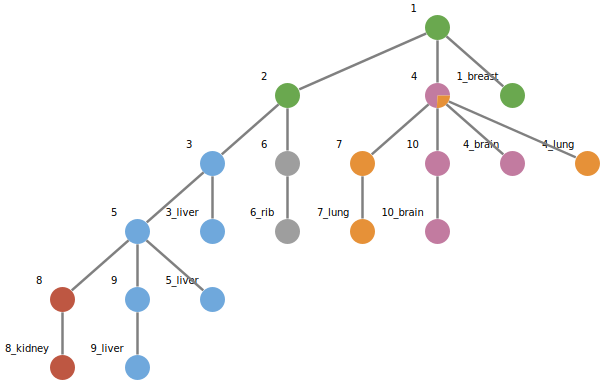

In [2]:
# Patient A7, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3571e-02],
        [-1.0000e+00, -1.0000e+00,  8.4034e-03,  3.6134e-01,  3.3613e-02,
          5.0420e-02],
        [-1.0000e+00,  9.3812e-02,  9.9800e-04,  2.0958e-02,  1.5369e-01,
          1.0379e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e

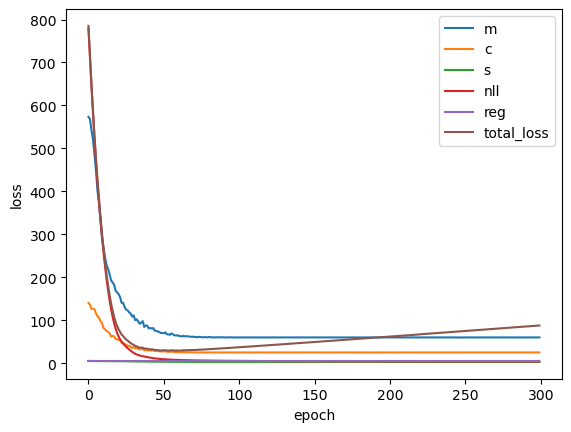

15:55:17 DEBUG

U > 0.05

15:55:17 DEBUG
        norm     1     2     3     4     5     6     7     8     9    10
breast 0.475 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.342 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000 0.000 0.361
kidney 0.571 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.397 0.000 0.000
liver  0.147 0.000 0.000 0.460 0.000 0.000 0.000 0.000 0.000 0.374 0.000
lung   0.305 0.000 0.000 0.000 0.000 0.000 0.000 0.601 0.000 0.000 0.000
rib    0.278 0.000 0.000 0.000 0.000 0.000 0.702 0.000 0.000 0.000 0.000
15:55:17 DEBUG

F_hat
15:55:17 DEBUG
          0     1     2     3     4     5     6     7     8     9     10
breast 0.991 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.965 0.622 0.000 0.000 0.622 0.000 0.000 0.000 0.000 0.000 0.361
kidney 0.968 0.397 0.397 0.397 0.000 0.397 0.000 0.000 0.397 0.000 0.000
liver  0.982 0.834 0.834 0.834 0.000 0.834 0.000 0.000 0.000 0.374 0.000
lung   0.906 0.601 0.000 0.000 0.601 0.000 0.0

Time elapsed: 14.594201
print_config.k_best_trees 1
****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.032
Reg: 6.0
Organotropism penalty: 0.701
site_adj_no_diag
 tensor([[0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,

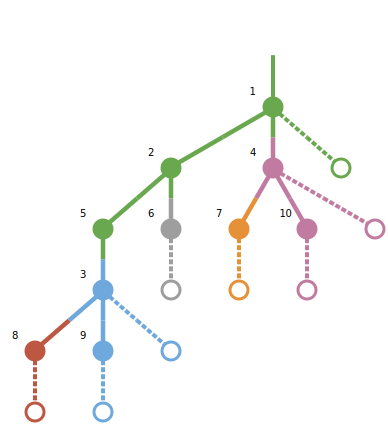

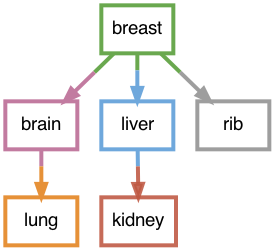

15:55:18 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


  1   #6aa84fff;1.0:
  2   #6aa84fff;1.0:
  1     2   0.031249999650754035 2.0
  1   #6aa84fff;1.0:
  4   #c27ba0ff;0.7413610816001892:#e69138ff;0.2586389482021332:
  1     4   0.031249999650754035 2.5
  1   #6aa84fff;1.0:
1_breast #6aa84fff;1.0:
  1   1_breast 0.031249999650754035 2.5
  2   #6aa84fff;1.0:
  5   #6aa84fff;0.5070328712463379:#6fa8dcff;0.4929670989513397:
  2     5   0.031249999650754035 2.5
  2   #6aa84fff;1.0:
  6   #9e9e9eff;1.0:
  2     6   0.031249999650754035 2.5
  3   #6fa8dcff;1.0:
  8   #be5742ff;1.0:
  3     8   0.031249999650754035 2.5
  3   #6fa8dcff;1.0:
  9   #6fa8dcff;1.0:
  3     9   0.031249999650754035 2.5
  3   #6fa8dcff;1.0:
3_liver #6fa8dcff;1.0:
  3   3_liver 0.031249999650754035 2.5
  4   #c27ba0ff;0.7413610816001892:#e69138ff;0.2586389482021332:
  7   #e69138ff;1.0:
  4     7   0.031249999650754035 2.5
  4   #c27ba0ff;0.7413610816001892:#e69138ff;0.2586389482021332:
  10  #c27ba0ff;1.0:
  4     10  0.031249999650754035 2.5
  4   #c27ba0ff;0.741361

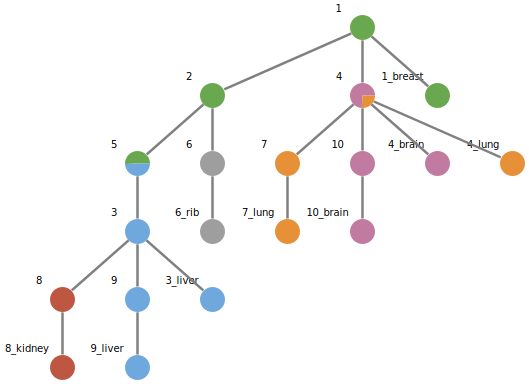

In [3]:
# Patient A7, tree 2 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


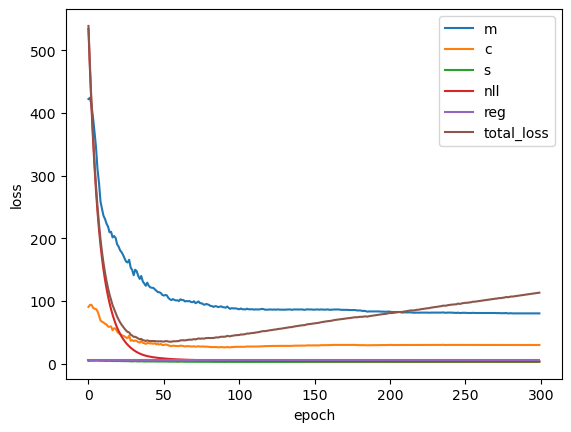

15:55:32 DEBUG

U > 0.05

15:55:32 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.405 0.000 0.000 0.000 0.000 0.000 0.000 0.053 0.402 0.000
adrenal 0.189 0.000 0.344 0.000 0.000 0.000 0.427 0.000 0.000 0.000
liver   0.091 0.000 0.384 0.000 0.051 0.000 0.000 0.441 0.000 0.000
lung    0.582 0.087 0.000 0.000 0.000 0.265 0.000 0.000 0.000 0.000
spinal  0.570 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.370
15:55:32 DEBUG

F_hat
15:55:32 DEBUG
            0     1     2     3     4     5     6     7     8     9
breast  0.861 0.456 0.053 0.402 0.053 0.402 0.000 0.053 0.402 0.000
adrenal 0.960 0.771 0.771 0.000 0.427 0.000 0.427 0.000 0.000 0.000
liver   0.967 0.876 0.876 0.000 0.492 0.000 0.000 0.441 0.000 0.000
lung    0.934 0.352 0.000 0.265 0.000 0.265 0.000 0.000 0.000 0.000
spinal  0.940 0.370 0.000 0.370 0.000 0.000 0.000 0.000 0.000 0.370
15:55:32 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 13.948444
print_config.k_best_trees 1
****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.444
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000, 

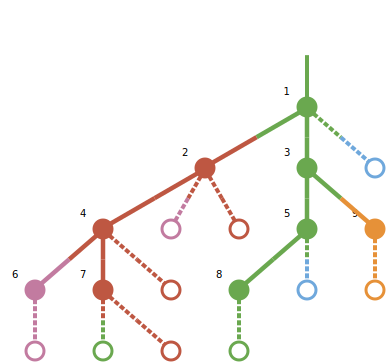

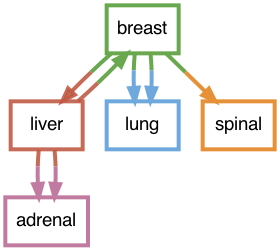

15:55:33 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


  1   #6aa84fff;1.0:
  2   #be5742ff;0.5745345950126648:#6aa84fff;0.2058774083852768:#c27ba0ff;0.2195879966020584:
  1     2   0.03125000058207661 2.0
  1   #6aa84fff;1.0:
  3   #6aa84fff;0.5384671092033386:#6fa8dcff;0.13898099958896637:#e69138ff;0.3225518465042114:
  1     3   0.03125000058207661 2.5
  1   #6aa84fff;1.0:
1_lung #6fa8dcff;1.0:
  1   1_lung 0.03125000058207661 2.5
  2   #be5742ff;0.5745345950126648:#6aa84fff;0.2058774083852768:#c27ba0ff;0.2195879966020584:
  4   #be5742ff;0.8531530499458313:#c27ba0ff;0.1468469351530075:
  2     4   0.03125000058207661 2.5
  2   #be5742ff;0.5745345950126648:#6aa84fff;0.2058774083852768:#c27ba0ff;0.2195879966020584:
2_adrenal #c27ba0ff;1.0:
  2   2_adrenal 0.03125000058207661 2.5
  2   #be5742ff;0.5745345950126648:#6aa84fff;0.2058774083852768:#c27ba0ff;0.2195879966020584:
2_liver #be5742ff;1.0:
  2   2_liver 0.03125000058207661 2.5
  3   #6aa84fff;0.5384671092033386:#6fa8dcff;0.13898099958896637:#e69138ff;0.3225518465042114:
  5   #6aa84f

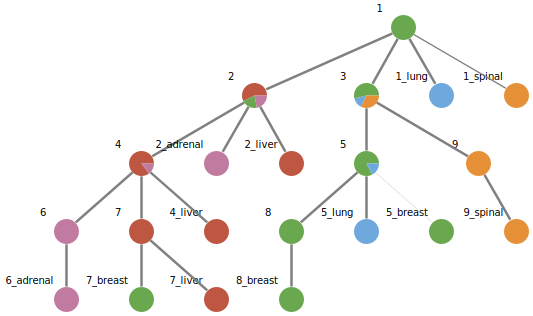

In [4]:
# Patient A1, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


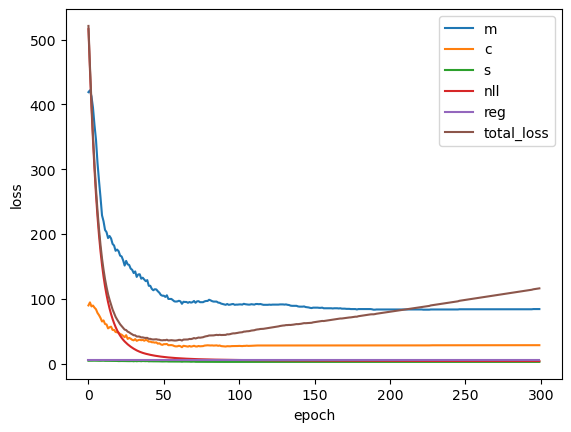

15:55:47 DEBUG

U > 0.05

15:55:47 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.407 0.000 0.000 0.000 0.058 0.000 0.000 0.000 0.404 0.000
adrenal 0.187 0.000 0.342 0.000 0.000 0.000 0.423 0.000 0.000 0.000
liver   0.064 0.000 0.000 0.000 0.481 0.000 0.000 0.411 0.000 0.000
lung    0.593 0.079 0.000 0.000 0.000 0.270 0.000 0.000 0.000 0.000
spinal  0.564 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.371
15:55:47 DEBUG

F_hat
15:55:47 DEBUG
            0     1     2     3     4     5     6     7     8     9
breast  0.869 0.462 0.058 0.404 0.058 0.404 0.000 0.000 0.404 0.000
adrenal 0.952 0.765 0.765 0.000 0.423 0.000 0.423 0.000 0.000 0.000
liver   0.955 0.891 0.891 0.000 0.481 0.000 0.000 0.411 0.000 0.000
lung    0.942 0.349 0.000 0.270 0.000 0.270 0.000 0.000 0.000 0.000
spinal  0.934 0.371 0.000 0.371 0.000 0.000 0.000 0.000 0.000 0.371
15:55:47 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


Time elapsed: 14.345616
print_config.k_best_trees 1
****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.812
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000, 

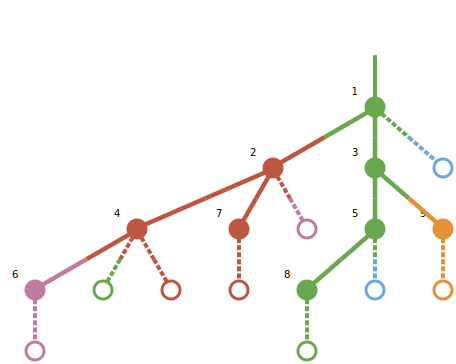

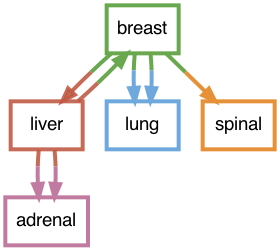

15:55:48 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


  1   #6aa84fff;1.0:
  2   #be5742ff;0.4847225844860077:#c27ba0ff;0.470817506313324:#6aa84fff;0.04445992410182953:
  1     2   0.031249999614374246 2.0
  1   #6aa84fff;1.0:
  3   #6aa84fff;0.7016308903694153:#6fa8dcff;0.14877279102802277:#e69138ff;0.14959625899791718:
  1     3   0.031249999614374246 2.5
  1   #6aa84fff;1.0:
1_lung #6fa8dcff;1.0:
  1   1_lung 0.031249999614374246 2.5
  2   #be5742ff;0.4847225844860077:#c27ba0ff;0.470817506313324:#6aa84fff;0.04445992410182953:
  4   #be5742ff;0.8373297452926636:#c27ba0ff;0.1626702845096588:
  2     4   0.031249999614374246 2.5
  2   #be5742ff;0.4847225844860077:#c27ba0ff;0.470817506313324:#6aa84fff;0.04445992410182953:
  7   #be5742ff;1.0:
  2     7   0.031249999614374246 2.5
  2   #be5742ff;0.4847225844860077:#c27ba0ff;0.470817506313324:#6aa84fff;0.04445992410182953:
2_adrenal #c27ba0ff;1.0:
  2   2_adrenal 0.031249999614374246 2.5
  3   #6aa84fff;0.7016308903694153:#6fa8dcff;0.14877279102802277:#e69138ff;0.14959625899791718:
  5   #6a

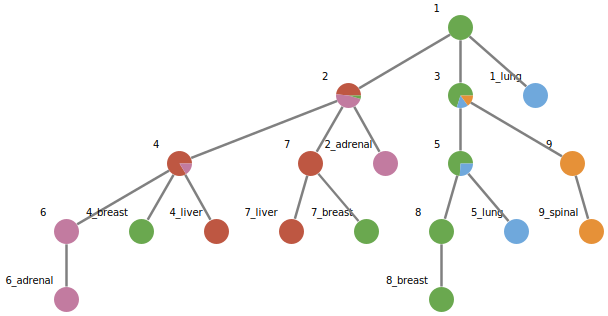

In [5]:
# Patient A1, tree 2 (reported)
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)
